# Fashion MNIST 실습

In [1]:
import numpy as np
import pandas as pd

In [2]:
# keras fashion mnist dataset을 다운로드
from tensorflow.keras.datasets import fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [4]:
print("train dataset shape:", train_images.shape, train_labels.shape)
print("test dataset shape:", test_images.shape, test_labels.shape)
# 60000개의 이미지, 28X28 2차원 gray_scale(가로세로가 28X28); 1차원 tuple로 존재

train dataset shape: (60000, 28, 28) (60000,)
test dataset shape: (10000, 28, 28) (10000,)


Text(0.5, 1.0, '9')

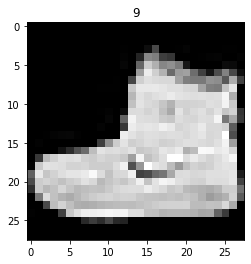

In [6]:
# 시각화
# ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(train_images[0], cmap='gray')
plt.title(train_labels[0])

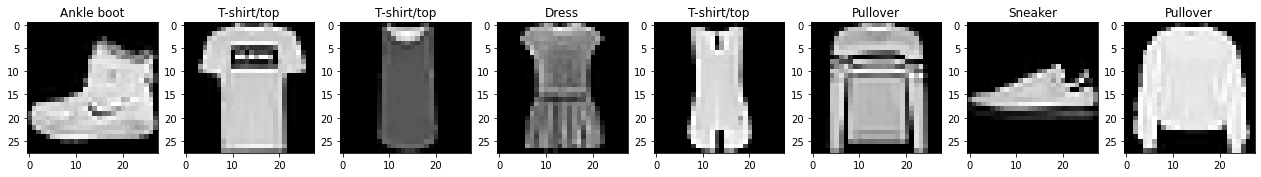

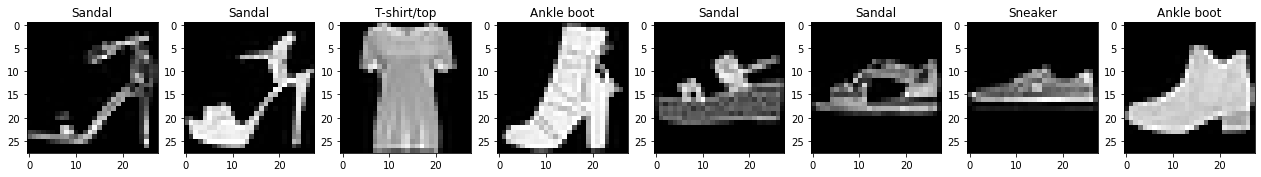

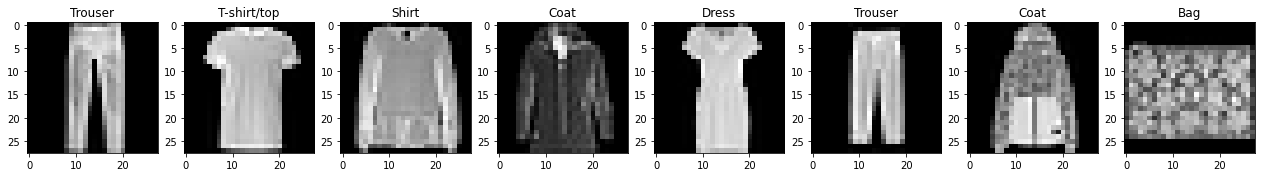

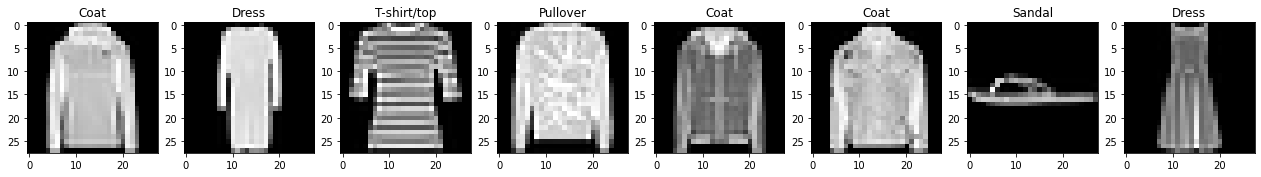

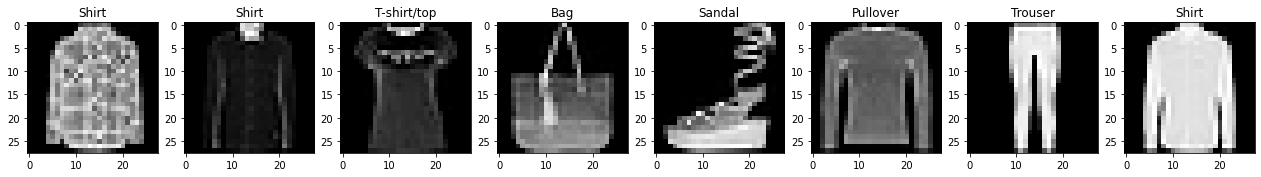

In [10]:
import seaborn as sns
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


def show_images(images, labels, ncols=8):
    figure, axs = plt.subplots(figsize=(22, 6), nrows=1, ncols=ncols)
    for i in range(ncols):
        axs[i].imshow(images[i], cmap='gray')
        axs[i].set_title(class_names[labels[i]])

for x in range(0, 5):
    show_images(train_images[x*8 :(x+1)*8], train_labels[x*8 :(x+1)*8], ncols=8) # 하나의 layer를 생성함

    

In [11]:
# 데이터 전처리 수행.
# 0~1 사이 값으로 변경(데이터가 크기보다는 작게하는게 성능이 빨라짐)
def get_preprocessed_data(images, labels):
    images = np.array(images/255.0, dtype=np.float32)
    labels = np.array(labels, dtype=np.float32)
    
    return images, labels

In [12]:
train_images[0] # 전처리 수행전

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [13]:
# 데이터 전처리
train_images, train_labels = get_preprocessed_data(train_images, train_labels)
test_images, test_labels = get_preprocessed_data(test_images, test_labels)

print("train dataset shape:", train_images.shape, train_labels.shape)
print("test dataset shape:", test_images.shape, test_labels.shape)

train dataset shape: (60000, 28, 28) (60000,)
test dataset shape: (10000, 28, 28) (10000,)


In [14]:
train_images[0] # 데이터 전처리 후

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [17]:
INPUT_SIZE = 28
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential

In [19]:
model = Sequential([
    Flatten(input_shape=(INPUT_SIZE, INPUT_SIZE)), # Flatten => 1차원으로 바꿔줌, 왜냐하면 layer는 1차원밖에 못받기 때문
    Dense(100, activation='relu'),                 # 784개의 1차원 데이터가 들어감
    Dense(30, activation='relu'),
    Dense(10, activation='softmax')
])

model.summary() #100개 정도의 오차(bias)가 나와서 param이 78500개임

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_4 (Dense)              (None, 30)                3030      
_________________________________________________________________
dense_5 (Dense)              (None, 10)                310       
Total params: 81,840
Trainable params: 81,840
Non-trainable params: 0
_________________________________________________________________


In [21]:
# 모델의 Loss와 optimizer 설정하고 학습 수행
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.metrics import Accuracy

model.compile(optimizer=Adam(0.001), loss='categorical_crossentropy', metrics=['accuracy'])
# target을 one-hot encoding해야함
# one-hot encoding안하고 싶으면 sparse_categorical_crossentropy를 함

In [22]:
from tensorflow.keras.utils import to_categorical

train_oh_labels = to_categorical(train_labels)
test_oh_labels = to_categorical(test_labels)

print(train_oh_labels.shape, test_oh_labels.shape)

(60000, 10) (10000, 10)


In [23]:
train_images.shape # batch size로 받아들이고

(60000, 28, 28)

In [24]:
history = model.fit(x=train_images, y=train_oh_labels, batch_size=32, epochs=20, verbose=1)

Epoch 1/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5150 - accuracy: 0.8184
Epoch 2/20
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3774 - accuracy: 0.8636
Epoch 3/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3396 - accuracy: 0.8758
Epoch 4/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3173 - accuracy: 0.8848
Epoch 5/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2982 - accuracy: 0.8910
Epoch 6/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2858 - accuracy: 0.8928
Epoch 7/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2760 - accuracy: 0.8970
Epoch 8/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2651 - accuracy: 0.8997
Epoch 9/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2568 - accuracy: 0.9045
Epoch 10/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.248

In [25]:
print(history.history['loss'])
print(history.history['accuracy'])

[0.5149638056755066, 0.37738823890686035, 0.3396091163158417, 0.317272424697876, 0.2982461452484131, 0.2857668399810791, 0.27601760625839233, 0.26507318019866943, 0.2568167746067047, 0.24865998327732086, 0.23784558475017548, 0.2342277616262436, 0.22634848952293396, 0.22058719396591187, 0.21332745254039764, 0.21039241552352905, 0.2039799839258194, 0.19818449020385742, 0.19214265048503876, 0.18845929205417633]
[0.8183500170707703, 0.8635833263397217, 0.8757666945457458, 0.8847500085830688, 0.8910333514213562, 0.8927666544914246, 0.8969666957855225, 0.899733304977417, 0.904533326625824, 0.9060333371162415, 0.9107499718666077, 0.9132833480834961, 0.9132333397865295, 0.9168333411216736, 0.9195166826248169, 0.9212833046913147, 0.9231500029563904, 0.9245833158493042, 0.9269499778747559, 0.9283166527748108]


In [26]:
test_images.shape

(10000, 28, 28)

In [27]:
pred_proba = model.predict(test_images)
print(pred_proba.shape)

(10000, 10)


In [28]:
pred_proba[0]

array([1.34817562e-08, 1.16503023e-11, 1.05905125e-08, 4.69107553e-09,
       2.19256524e-09, 2.53189268e-04, 5.04574604e-09, 1.65674166e-04,
       1.35244580e-08, 9.99581158e-01], dtype=float32)